# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Hồ Đăng Duy
- Student ID: 22127085
- Class: 22CLC09

## Required Libraries

In [17]:
# IMPORT YOUR LIBS HERE
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Function Definitions

In [18]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    img = Image.open(img_path)
    img = np.array(img)
    return img

def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : ndarray
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img, cmap='gray', aspect='auto')

def save_img(image, img_path, type_name):
    '''
    Save image to file

    Parameters
    ----------
    image : np.ndarray
        Result image after finish algorithm
    img_path : str
        Path of image
    type_name : str
        Type of image
    '''
    # YOUR CODE HERE
    image = Image.fromarray(image)
    image.save(img_path.split('.')[0] + '_' + type_name + '.png','png', resolution=100.0)

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def adjust_brightness(image, brightness):
    '''
    Adjust the brightness of the image

    Parameters
    ----------
    image : np.ndarray
        3D image array (or 2D for grayscale)
    brightness : int
        Brightness adjustment value
        Positive value for increase brightness
        Negative value for decrease brightness
    Returns
    -------
    np.ndarray
        Brightness adjusted image
    '''
    image = np.array(image)
    bright_image = np.uint8(
        np.clip(image + np.array([brightness], dtype=np.int16), 0, 255))
    #result = Image.fromarray(bright_image)
    return bright_image

def adjust_contrast(image, contrast):
    '''
    Adjust the contrast of the image

    Parameters
    ----------
    image : np.ndarray
        3D image array (or 2D for grayscale)
    contrast : float
        Contrast adjustment factor
        Positive for increasing contrast
        Negative for decreasing contrast
        Can be negative for inversion effect

    Returns
    -------
    np.ndarray
        Contrast adjusted image
    '''
    # Convert the image to float to prevent overflow during multiplication
    image = np.array(image, dtype=np.float32)
    if contrast == 0:
        return image.astype(np.uint8)  
    elif contrast > 0:
        contrast = 1/contrast
    else:  
        contrast = -contrast
    # Calculate mean pixel value
    mean = np.mean(image)

    # Adjust contrast by scaling pixel values around the mean
    contrast_image = (image - mean) * contrast + mean

    # Clip pixel values to be in allowable range [0, 255]
    contrast_image = np.clip(contrast_image, 0, 255)

    # Convert back to uint8
    result = contrast_image.astype(np.uint8)

    return result

def flip_horizontal(image):
    '''
    Flip the image horizontally

    Parameters
    ----------
    image : np.ndarray
        3D image array (or 2D for grayscale)

    Returns
    -------
    np.ndarray
        Horizontally flipped image
    '''
    img = np.array(image)
    if img.ndim == 3:
        # For 3D images, flip along the horizontal axis
        flipped_img = img[:, ::-1, :]
    elif img.ndim == 2:
        # For 2D images, flip along the horizontal axis
        flipped_img = img[:, ::-1]

    result = flipped_img.astype(np.uint8)
    #result = Image.fromarray(result)
    return result

def flip_vertical(image):
    '''
    Flip the image vertically

    Parameters
    ----------
    image : np.ndarray
        3D image array (or 2D for grayscale)

    Returns
    -------
    Image
        Vertically flipped image
    '''
    img = np.array(image)
    if img.ndim == 3:
        # For 3D images, flip along the vertical axis
        flipped_img = img[::-1, :, :]
    elif img.ndim == 2:
        # For 2D images, flip along the vertical axis
        flipped_img = img[::-1, :]

    result = flipped_img.astype(np.uint8)
    #result = Image.fromarray(result)
    return result

def rgb_to_gray(image):
    '''
    Convert the image from RGB to Grayscale

    Parameters
    ----------
    image : np.ndarray
        3D image array

    Returns
    -------
    Image
        Grayscale image
    '''
    if image.ndim == 2:
        result = image.astype(np.uint8)
        return image
    img = np.array(image)
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    gray = (R*0.3+G*0.59+B*0.11)
    gray = np.clip(gray,0,255)
    result = gray.astype(np.uint8)
    #result = Image.fromarray(gray)
    return result

def rgb_to_sepia(image):
    '''
    Convert the image from RGB to sepia

    Parameters
    ----------
    image : np.ndarray
        3D image array

    Returns
    -------
    Image
        Sepia image
    '''
    img = np.array(image)
    if img.ndim == 2:
        R = G = B = img
    else:
        R = img[:, :, 0]
        G = img[:, :, 1]
        B = img[:, :, 2]
    img = np.dstack((R*0.393 + G*0.769 + B*0.189,
                    R*0.349 + G*0.686 + B*0.168,
                     R*0.272 + G*0.534 + B*0.131))
    img = np.clip(img, 0, 255)
    result = img.astype(np.uint8)
    #result = Image.fromarray(result)
    return result

def blur_image(image, kernel_size):
    """
    Apply a blur effect to the image
    Parameters
    ----------
    image : np.ndarray
        3D image array
    kernel_size : int
        Size of the blurring kernel
    Returns
    -------
    Image
        Blurred image
    """
    image = np.array(image)
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd integer.")

    if len(image.shape) == 2:  # Grayscale image
        channels = 1
    elif len(image.shape) == 3:  # RGB image
        channels = image.shape[2]
    else:
        raise ValueError("Unsupported image format.")
    height, width = image.shape[:2]

    # Create an averaging kernel
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

    # Pad the image to handle borders
    pad_size = kernel_size // 2
    padded_img = np.pad(
        image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)) if channels == 3 else ((pad_size, pad_size), (pad_size, pad_size)), mode='reflect')

    # Initialize the output image
    blur_image = np.zeros_like(image)

    # Apply the convolution for each channel
    for c in range(channels):
        for i in range(height):
            for j in range(width):
                if channels == 3:
                    region = padded_img[i:i + kernel_size, j:j + kernel_size, c]
                    blur_image[i, j, c] = np.sum(region * kernel)
                else:
                    region = padded_img[i:i + kernel_size, j:j + kernel_size]
                    blur_image[i, j] = np.sum(region * kernel)
                
    
    result = blur_image.astype(np.uint8)
    # result = Image.fromarray(result)
    return result

def sharpen_image(image):
    '''
    Apply a sharpen effect to the image
    
    Parameters
    ----------
    image : np.ndarray
        3D image array

    Returns
    -------
    Image
        Sharpened image
    '''
    image = np.array(image)

    if len(image.shape) == 2:  # Grayscale image
        channels = 1
    elif len(image.shape) == 3:  # RGB image
        channels = image.shape[2]
    else:
        raise ValueError("Unsupported image format.")
    height, width = image.shape[:2]

    # Create an averaging kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    # Pad the image to handle borders
    pad_size = 1
    padded_img = np.pad(
        image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)) if channels == 3 else ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')

    # Initialize the output image
    sharpened_image = np.zeros_like(image, dtype = float)

    # Apply the convolution for each channel
    for c in range(channels):
        for i in range(height):
            for j in range(width):
                if channels == 3:
                    region = padded_img[i:i + kernel.shape[0],
                                        j:j + kernel.shape[1], c]
                    sharpened_image[i, j, c] = np.sum(region * kernel)
                else:
                    region = padded_img[i:i +
                                        kernel.shape[0], j:j + kernel.shape[1]]
                    sharpened_image[i, j] =float(np.sum(region * kernel))

    sharpened_image = np.clip(sharpened_image, 0, 255)
    result = sharpened_image.astype(np.uint8)
    # result = Image.fromarray(result)
    return result

def crop_center(image, size):
    '''
    Crop the image at the center to the specified size
    
    Parameters
    ----------
    image : np.ndarray
        3D image array
    size : int
        Size of the new image (size x size)
    
    Returns
    -------
    Image
        Center-cropped image
    '''
    image = np.array(image)
    height = image.shape[0]
    width = image.shape[1]
    
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size
    
    cropped_image = image[top:bottom, left:right]
    
    #cropped_image = Image.fromarray(cropped_image_array)
    return cropped_image

def circular_crop(image):
    '''
    Crop the image to a circular shape
    
    Parameters
    ----------
    image : np.ndarray
        3D image array
    
    Returns
    -------
    Image
        Circular cropped image
    '''
    image = np.array(image)
    row = image.shape[0]
    col = image.shape[1]

    y, x = np.ogrid[:col, :row]
    center_x = col//2
    center_y = row//2

    mask = (x-center_x)**2 + (y-center_y)**2 <= (row//2)**2
    if image.ndim == 3:
        crop = image*mask[:, :, np.newaxis]
    else:
        crop = image*mask
    #crop = image*mask[:, :, np.newaxis]
    result = crop.astype(np.uint8)
    #result = Image.fromarray(result)
    return result

def elliptical_crop(image, size):
    '''
    Crop the image with two intersecting ellipses sharing the same center but having different orientations.
    
    Parameters
    ----------
    image : np.ndarray
        3D image array
    size: float
        The size of the ellipse
        
    Returns
    -------
    Image
        The image cropped with intersecting elliptical shapes.
    '''
    # Convert image to array
    img = np.array(image)
    row = img.shape[0]
    col = img.shape[1]

    y, x = np.ogrid[:col, :row]
    
    center_x = col // 2
    center_y = row // 2
    
    mask_1 = (x+y - center_x - center_y)**2 / (size * row**2) + (x-y - center_x + center_y)**2 / ( (1-size) * row**2) <= 1
    mask_2 = (x+y - center_x - center_y)**2 / ((1-size) * row**2) + (x-y - center_x + center_y)**2 / ( size * row**2) <= 1

    mask = mask_1 | mask_2
    if image.ndim == 3:
        elliptical_image = img * mask[:, :, np.newaxis]
    else:
        elliptical_image = img * mask

    result = elliptical_image.astype(np.uint8)
    #result = Image.fromarray(elliptical_image.astype(np.uint8))

    return result

def zoom_img(image,percent):
    '''
    Zoom image by percent

    Parameters
    ----------
    image : np.ndarray
        3D image array

    percent : float
        Percent to zoom
    ----------
    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    height = image.shape[0]
    width = image.shape[1]
    new_height = int(height * percent)
    new_width = int(width * percent)
    if image.ndim == 3:
        new_img = np.zeros((new_height, new_width, 3))
        for i in range(new_height):
            for j in range(new_width):
                new_img[i,j,:] = image[int(i/percent), int(j/percent), :]
    else:
        new_img = np.zeros((new_height, new_width))
        for i in range(new_height):
            for j in range(new_width):
                new_img[i,j] = image[int(i/percent), int(j/percent)]
    result = new_img.astype(np.uint8)
    #result = Image.fromarray(result)
    return result

def show_result(img,output_path, choice):
    type = 0
    if choice == 1 or choice == 0:
        # Adjust brightness
        brightness = int(input('Enter brightness value [-255:255]: '))
        result = adjust_brightness(img, brightness)
        show_img(result)
        if brightness < 0:
            save_img(result, output_path, 'decrese_brightness')
        else:
            save_img(result, output_path, 'increase_brightness')
    if choice == 2 or choice == 0:
        # Adjust contrast
        contrast = float(input('Enter contrast value: '))
        result = adjust_contrast(img, contrast)
        show_img(result)
        save_img(result,output_path, 'contrast')
    if choice == 3 or choice == 0:
        if choice != 0:
            type = int(input('Enter type of flip (1: horizontal, 2: vertical): '))
        if type == 1 or choice == 0:
            # 3.1 Flip horizontally
            result = flip_horizontal(img)
            show_img(result)
            save_img(result, output_path, 'flip_horizontal')
        if type == 2 or choice == 0:
            # 3.2 Flip vertically
            result = flip_vertical(img)
            show_img(result)
            save_img(result, output_path, 'flip_vertical')
        else:
            print('Invalid choice')
    if choice == 4 or choice == 0:
        if choice != 0:
            type = int(input('Enter type of convert (1: RGB to Gray, 2: RGB to Sepia): '))
        if type == 1 or choice == 0:
            # 4.1 RGB to Gray
            result = rgb_to_gray(img)
            show_img(result)
            save_img(result, output_path, 'gray')
        if type == 2 or choice == 0:
            # 4.2 RGB to Sepia
            result = rgb_to_sepia(img)
            show_img(result)
            save_img(result, output_path, 'sepia')
        else:
            print('Invalid choice')
    if choice == 5 or choice == 0:
        if choice != 0:
            type = int(input('Enter type of convert (1: Blur image, 2: Sharpen image): '))
        if type == 1 or choice == 0:
            # 5.1 Blur image
            kernel_size = int(input('Enter kernel_size (odd integer) for blurring: '))
            result = blur_image(img, kernel_size)
            show_img(result)
            save_img(result, output_path, 'blur')
        if type == 2 or choice == 0:
            # 5.2 Sharpen image
            result = sharpen_image(img)
            show_img(result)
            save_img(result, output_path, 'sharpen')
    if choice == 6 or choice == 0:
        # Center crop image
        size = int(input('Enter the side length (int) of the new square image: '))
        result = crop_center(img, size)
        show_img(result)
        save_img(result, output_path, 'center_crop')
    if choice == 7 or choice == 0:
        if choice != 0:
            type = int(input('Enter type of crop (1: Circular crop, 2: Elliptical crop): '))
        if type == 1 or choice == 0:
            # 7.1 Circular crop
            result = circular_crop(img)
            show_img(result)
            save_img(result, output_path, 'circular_crop')
        if type == 2 or choice == 0:
            # 7.2 Elliptical crop
            size = float(input('Enter size of ellipse (0 <= size <= 1): '))
            result = elliptical_crop(img, size)
            show_img(result)
            save_img(result, output_path, 'elliptical_crop')        
    if choice == 8 or choice == 0:
        if choice != 0:
            type = int(input('Enter type of zoom (1: Zoom 2x, 2: Zoom 0.5x): '))
        # Zoom in image
        if type == 1 or choice == 0:
            result = zoom_img(img, 2)
            show_img(result)
            save_img(result, output_path, 'zoom_2x')
        # Zoom out image
        if type == 2 or choice == 0:
            result = zoom_img(img, 0.5)
            show_img(result)
            save_img(result, output_path, 'zoom_0.5x')
    if choice not in range(0,9):
        print('Invalid choice')
    

<ins>Note:</ins> For clarity, include docstrings with each function.

## Main FUNCTION

In [19]:
# YOUR CODE HERE
def main():
    img_path = input('Enter the path of the image: ')
    # Read the image
    img = read_img(img_path)

    # Convert the image to 1D
    print("Choose an image processing operation:")
    print("0. Perform all operations")
    print("1. Adjust Brightness")
    print("2. Adjust Contrast")
    print("3. Flip Image")
    print("4. Convert to Grayscale/Sepia")
    print("5. Blur Image/Sharpen Image")
    print("6. Crop Image At Center")
    print("7. Circular Crop or Elliptical Crop")
    print("8. Zoom Image")
    
    choice = int(input("Enter your choice: "))
    
    show_result(img, img_path, choice)

Choose an image processing operation:
0. Perform all operations
1. Adjust Brightness
2. Adjust Contrast
3. Flip Image
4. Convert to Grayscale/Sepia
5. Blur Image/Sharpen Image
6. Crop Image At Center
7. Circular Crop or Elliptical Crop
8. Zoom Image


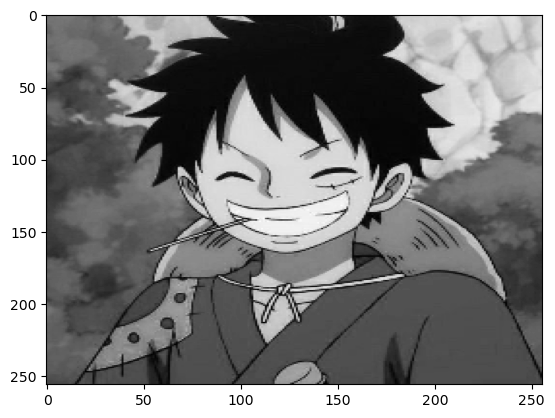

In [20]:
# Call main function
if __name__ == '__main__':
    main()